# Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning and Visualization

In [20]:
heart_data = pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
heart_data.target.value_counts(normalize=True) 

1    0.544554
0    0.455446
Name: target, dtype: float64

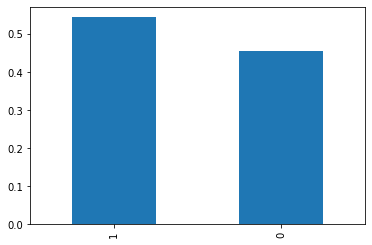

In [22]:
heart_data.target.value_counts(normalize=True).plot(kind='bar')

looks like a balanced data set with almost 54% data as having the heart disease

In [23]:
#check if null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
heart_data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Text(0.5, 0, 'Boxplot distribution with age')

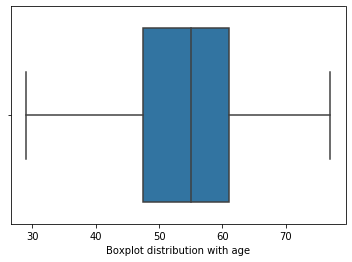

In [25]:
sns.boxplot('age',data=heart_data) 
plt.xlabel('Boxplot distribution with age')

mean lying close to 55 and majority is distributed between 45-63

In [26]:
heart_data.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [27]:
bins  =   [29,41,53,65,78]
labels = ['29-40', '41-52','53-64','65-77']
heart_data['Age_Group'] = pd.cut(heart_data['age'],right=False , bins= bins,labels = labels)
heart_data['Age_Group']

0      53-64
1      29-40
2      41-52
3      53-64
4      53-64
       ...  
298    53-64
299    41-52
300    65-77
301    53-64
302    53-64
Name: Age_Group, Length: 303, dtype: category
Categories (4, object): [29-40 < 41-52 < 53-64 < 65-77]

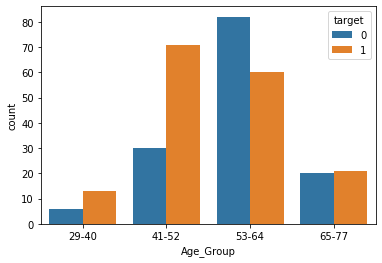

In [28]:
sns.countplot('Age_Group', data=heart_data,hue='target')  

looks like majority of the heart patient falls in 40-65 age group having heart disease, hence seems to be an important feature

In [29]:
heart_data.groupby('Age_Group')['target'].value_counts()

Age_Group  target
29-40      1         13
           0          6
41-52      1         71
           0         30
53-64      0         82
           1         60
65-77      1         21
           0         20
Name: target, dtype: int64

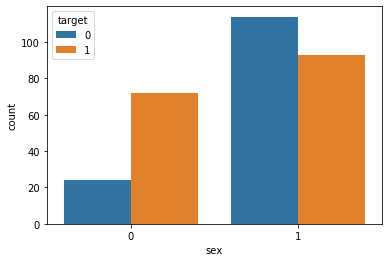

In [30]:
sns.countplot('sex', data=heart_data,hue='target') 

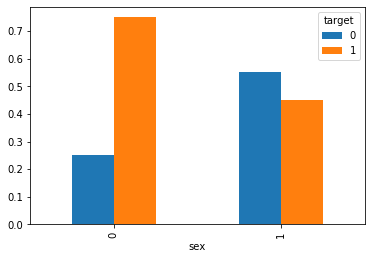

In [31]:
heart_data.groupby('sex')['target'].value_counts(normalize=True).unstack().plot(kind='bar')

more than 70% of the females suffer from heart disease, but the data is not equally distributed as it has more number of males

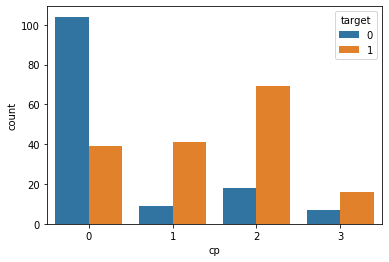

In [32]:
sns.countplot('cp', data= heart_data, hue= 'target')

Critical feature in determining heart disease as majority of people having "1" and "2" type of chest pain can have more chances of getting a heart disease


Text(0.5, 0, 'Max heart rate achieved')

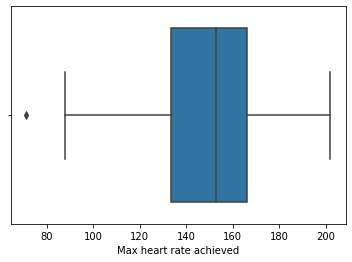

In [33]:
sns.boxplot('thalach', data= heart_data)
plt.xlabel('Max heart rate achieved')

In [34]:
heart_data[heart_data['thalach' ]>180]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29-40
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1,41-52
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1,29-40
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,41-52
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1,41-52
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1,41-52
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,29-40
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,29-40
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1,41-52
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1,41-52


In [35]:
bins  =   [90,101,112,123,134,145,156,167,178,189,200,211]
labels = ['Less than 100', '101-111','112-122','123-133','134-144','145-155','156-166','167-177','178-188','189-199','more than 200']
heart_data['Max_Heart_Rate'] = pd.cut(heart_data['thalach'],right=False , bins= bins,labels = labels)
heart_data['Max_Heart_Rate']

0      145-155
1      178-188
2      167-177
3      178-188
4      156-166
        ...   
298    123-133
299    123-133
300    134-144
301    112-122
302    167-177
Name: Max_Heart_Rate, Length: 303, dtype: category
Categories (11, object): [Less than 100 < 101-111 < 112-122 < 123-133 ... 167-177 < 178-188 < 189-199 < more than 200]

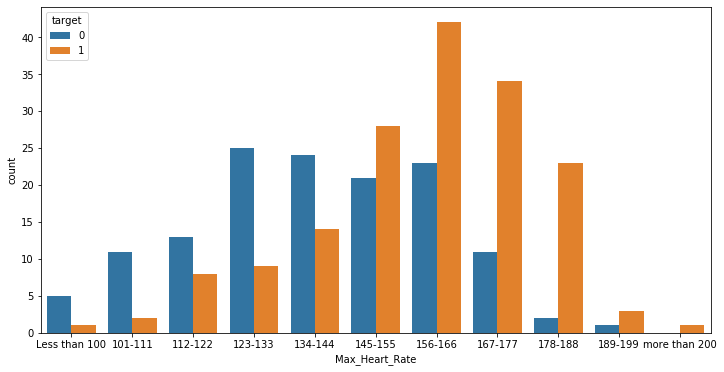

In [36]:

plt.figure(figsize=(12,6))
sns.countplot('Max_Heart_Rate', data = heart_data,hue='target')

heart beat ranges between 145-188 might have more cases of heart disease more reported according to dataset

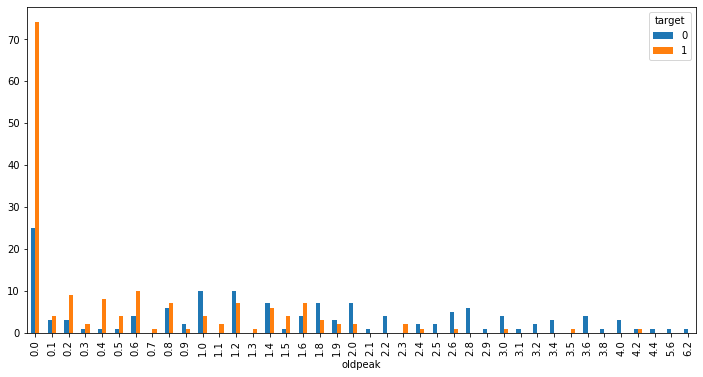

In [37]:
heart_data.groupby('oldpeak')['target'].value_counts().unstack().plot(kind='bar',figsize=(12,6))

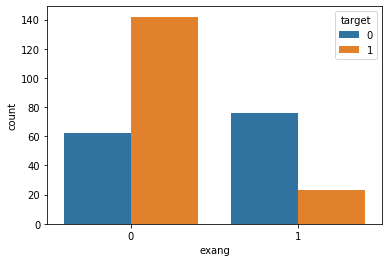

In [38]:
sns.countplot('exang',data=heart_data,hue='target')

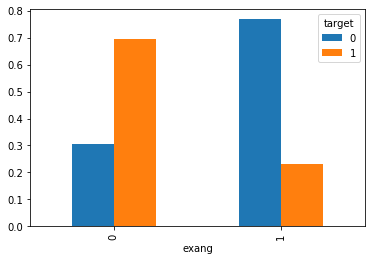

In [39]:
heart_data.groupby('exang')['target'].value_counts(normalize=True).unstack().plot(kind='bar')

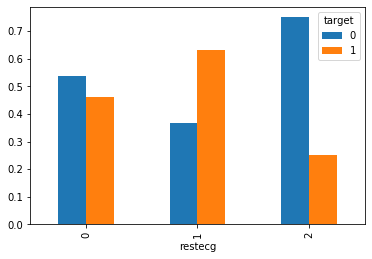

In [40]:
#0-1 lead to more heart disease chances
heart_data.groupby('restecg')['target'].value_counts(normalize=True).unstack().plot(kind='bar')

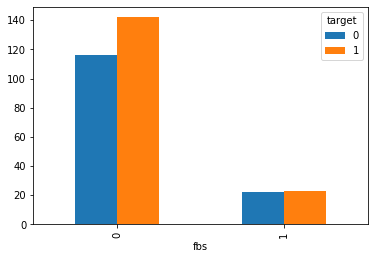

In [41]:
heart_data.groupby('fbs')['target'].value_counts(normalize=False).unstack().plot(kind='bar')

# Encoding Features

In [42]:
dummy_cp = pd.get_dummies(heart_data['cp'], prefix = 'CP')
dummy_slope =pd.get_dummies(heart_data['slope'], prefix = 'Slope') 
dummy_thal =pd.get_dummies(heart_data['thal'], prefix = 'Thal') 
dummy_heart_rate = pd.get_dummies(heart_data['Max_Heart_Rate'], prefix = "Heart_rate")
dummy_ageGroup = pd.get_dummies(heart_data['Age_Group'], prefix = 'AgeGroup')
heart_data = pd.concat([heart_data, dummy_cp,dummy_slope,dummy_slope,dummy_heart_rate, dummy_ageGroup], axis=1)
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Heart_rate_145-155,Heart_rate_156-166,Heart_rate_167-177,Heart_rate_178-188,Heart_rate_189-199,Heart_rate_more than 200,AgeGroup_29-40,AgeGroup_41-52,AgeGroup_53-64,AgeGroup_65-77
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,0,0,0,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,1,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,0,1,0


# Model Creation

In [43]:
new_df = heart_data.copy()

In [44]:
new_df =new_df.drop(['Age_Group','age','Max_Heart_Rate','cp','slope','thal','thalach'],axis=1)

In [45]:
new_df.head()

,sex,trestbps,chol,fbs,restecg,exang,oldpeak,ca,target,CP_0,...,Heart_rate_145-155,Heart_rate_156-166,Heart_rate_167-177,Heart_rate_178-188,Heart_rate_189-199,Heart_rate_more than 200,AgeGroup_29-40,AgeGroup_41-52,AgeGroup_53-64,AgeGroup_65-77
0,1,145,233,1,0,0,2.3,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,130,250,0,1,0,3.5,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,130,204,0,0,0,1.4,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,120,236,0,1,0,0.8,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,120,354,0,1,1,0.6,0,1,1,...,0,1,0,0,0,0,0,0,1,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['trestbps','chol','oldpeak']
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])
new_df.head()

,sex,trestbps,chol,fbs,restecg,exang,oldpeak,ca,target,CP_0,...,Heart_rate_145-155,Heart_rate_156-166,Heart_rate_167-177,Heart_rate_178-188,Heart_rate_189-199,Heart_rate_more than 200,AgeGroup_29-40,AgeGroup_41-52,AgeGroup_53-64,AgeGroup_65-77
0,1,0.763956,-0.256334,1,0,0,1.087338,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,-0.092738,0.072199,0,1,0,2.122573,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,-0.092738,-0.816773,0,0,0,0.310912,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,-0.663867,-0.198357,0,1,0,-0.206705,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,-0.663867,2.082050,0,1,1,-0.379244,0,1,1,...,0,1,0,0,0,0,0,0,1,0


# Random Forest Classifier

In [47]:
y = new_df['target']
X = new_df.drop('target',axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(n_estimators=400)
rf=rf.fit(X_train, y_train)
rf_score = rf.score(X_test,y_test)

In [50]:
predictions = rf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [53]:
print(confusion_matrix(y_test, predictions))

[[35  9]
 [ 4 43]]


In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

0.8571428571428571


In [55]:
print("Training accuracy of RandomForest Classifier: {:.2f}%".format(rf.score(X_train,y_train)*100))
print("Testing accuracy of RandomForest Classifier: {:.2f}%".format(rf.score(X_test,y_test)*100))

Training accuracy of RandomForest Classifier: 100.00%
Testing accuracy of RandomForest Classifier: 85.71%


# KNearest Neighbours

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,30):
    knn_classifier =KNeighborsClassifier(n_neighbors= i)
    score =cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn.append(score.mean())
    

Text(0.5, 1.0, 'Accuracy at respective K value')

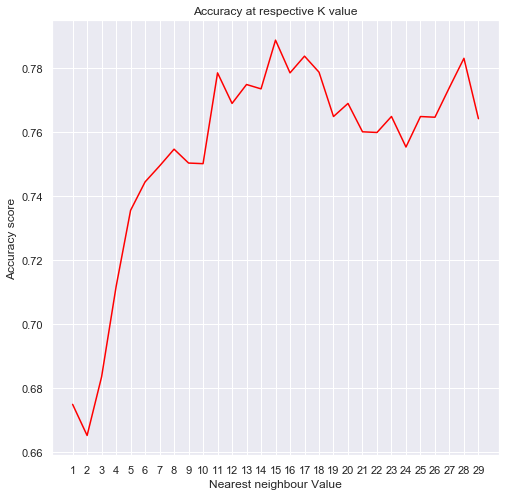

In [73]:
plt.figure(figsize=(8,8))
plt.plot([k for k in range(1,30)],knn,color='red' )
plt.xticks([k for k in range(1,30)])
plt.xlabel('Nearest neighbour Value')
plt.ylabel('Accuracy score')
plt.title('Accuracy at respective K value')

In [74]:
knn_classifier =KNeighborsClassifier(n_neighbors= 15)
score =cross_val_score(knn_classifier,X_train,y_train,cv=10)
accuracy_at_15=(score.mean())
accuracy_at_15

0.7886147186147185

In [59]:
from sklearn import metrics
knn_classifier =KNeighborsClassifier(n_neighbors= 15)
knn_classifier.fit(X_train,y_train)
predictions = knn_classifier.predict(X_test)
knn_score = knn_classifier.score(X_test,y_test)

In [60]:
print("Training accuracy of KNN at 15: {:.2f}%".format(knn_classifier.score(X_train,y_train)*100))
print("Testing accuracy of KNN at 15: {:.2f}%".format(knn_classifier.score(X_test,y_test)*100))

Training accuracy of KNN at 15: 78.77%
Testing accuracy of KNN at 15: 83.52%


# Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_score = nb.score(X_test,y_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Accuracy of Naive Bayes: 73.63%


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(lr_score*100))

Test Accuracy 82.42%


# Support Vector Classifier

In [66]:
from sklearn.svm import SVC
svm =  SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_score = svm.score(X_test,y_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_score*100))

Test Accuracy of SVM Algorithm: 87.91%


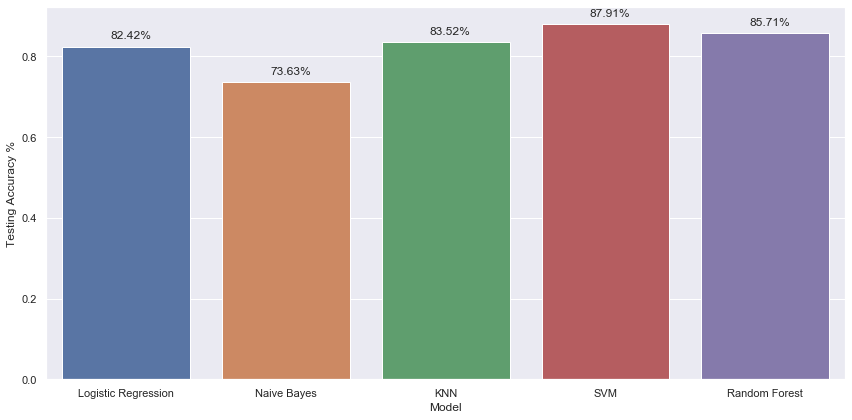

In [64]:
methods = ["Logistic Regression","Naive Bayes", "KNN", "SVM", "Random Forest"]
accuracy = [lr_score, nb_score, knn_score, svm_score, rf_score]

sns.set()
plt.figure(figsize=(12,6))
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]*100))
    
plt.tight_layout()
